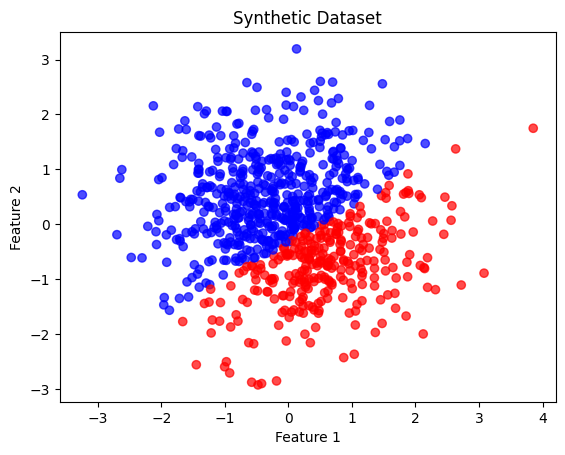

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate random features
X = np.random.randn(2, n_samples)  # 2 features, n_samples examples

# Generate a linearly separable target
# Define the true weights and bias
true_weight = np.array([[2], [-3]])
true_bias = -1

# Linear combination of features and true weights + bias
linear_combination = np.dot(true_weight.T, X) + true_bias

# Apply sigmoid to get probabilities
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target based on these probabilities
y = (probabilities > 0.5).astype(int)

# Flatten y to have shape (1, n_samples)
y = y.flatten()

# Split data into training and test sets
split_ratio = 0.8
split_index = int(n_samples * split_ratio)

X_train = X[:, :split_index]
y_train = y[:split_index]
X_test = X[:, split_index:]
y_test = y[split_index:]

# Plot the synthetic data
plt.scatter(X_train[0, :], X_train[1, :], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()


In [12]:
# %load ../src/ml/logistic_regression.py
import numpy as np
import matplotlib.pyplot as plt

#initialize
def initialize(dimension):

    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias
    
def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head

def forwardBackward(weight,bias,x_train,y_train):
    # Forward

    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost,gradients

def update(weight,bias,x_train,y_train, learningRate, iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression_fit(x_train, y_train, learningRate, iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    return parameters

def logistic_regression_predict(parameters, x_test, y_test):
    y_prediction = predict(parameters["weight"],parameters["bias"], x_test)
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 1000
cost: 0.11075861839644642


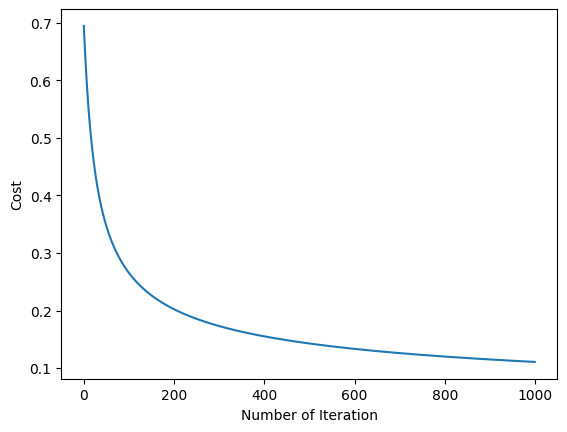

Test Accuracy: 99.50%


In [14]:
params = logistic_regression_fit(X_train, y_train, 0.1, 1000)
logistic_regression_predict(params, X_test, y_test)